In [86]:
#import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [87]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head(5)

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [88]:
#filter the data
filtered_data = df.groupby(['month','product', 'variant','market','platform', 'channel']).agg({
    'quantity': 'sum'
}).reset_index()

filtered_data.head()


,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [89]:
#find its shape
filtered_data.shape

(215453, 7)

In [90]:
filtered_data.head()

,month,product,variant,market,platform,channel,quantity
0,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,Brick & Mortar,Retailer,167
1,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Direct,61
2,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Australia,E-Commerce,Retailer,63
3,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,Brick & Mortar,Retailer,15
4,April,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Austria,E-Commerce,Direct,10


In [91]:
#one hot encoding for categorical columns
filtered_data = pd.get_dummies(filtered_data, columns=['product', 'variant', 'market', 'platform', 'channel'], prefix=None, dtype=int)
filtered_data.columns = filtered_data.columns.str.split('_').str[-1]

filtered_data.head()

,month,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,...,South Korea,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer
0,April,167,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,April,61,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,April,63,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,April,15,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,April,10,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [92]:
#label encoding for ordinal values
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()



In [93]:
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Apply the mapping to the 'month' column
filtered_data['month_numeric'] = filtered_data['month'].map(month_mapping)

In [94]:
filtered_data=filtered_data.drop(columns='month')

In [95]:
filtered_data.head(5)

,quantity,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,...,Spain,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric
0,167,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
1,61,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4
2,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,4
3,15,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


In [96]:
# Define a function to categorize the quantity
def categorize_sales(quantity):
    if quantity <= 250:
        return "Low sales"
    elif 250 < quantity <= 1000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
filtered_data['sales_range'] = filtered_data['quantity'].apply(categorize_sales)

In [97]:
#drop the columns
filtered_data.drop(columns='quantity',inplace=True)

In [98]:
filtered_data.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,4,Low sales
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,4,Low sales
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4,Low sales


In [99]:
#label encoding for quantity
filtered_data['sales_range'] = Le.fit_transform(filtered_data['sales_range'])

In [100]:
filtered_data.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Naive_bayes_prep_data.csv')

In [101]:
#Separate  X and Y
X_1 = filtered_data.drop("sales_range", axis = 1)
y_1 = filtered_data['sales_range']

In [102]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)


In [103]:
# Initializing and training the Naive Bayes classifier
nb_multi_model_2 = MultinomialNB()
nb_multi_model_2.fit(X_train_1, y_train_1)

# Predicting on the test data
y_pred_2 = nb_multi_model_2.predict(X_test_1)

In [104]:
# Compute accuracy score
accuracy_2 = accuracy_score(y_test_1, y_pred_2)

# Compute precision score
precision_2 = precision_score(y_test_1, y_pred_2, average='weighted') 

# Compute recall score
recall_2 = recall_score(y_test_1, y_pred_2, average='weighted')  

# Compute F1-Score
f1_2 = f1_score(y_test_1, y_pred_2, average='weighted')  

# Compute Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test_1, y_pred_2)

# Print the evaluation metrics
print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-Score:", f1_2)
print("Confusion Matrix:\n", conf_matrix_2)

Accuracy: 0.8584391172170522
Precision: 0.8627221999689635
Recall: 0.8584391172170522
F1-Score: 0.8557290185456592
Confusion Matrix:
 [[ 1261   196  1383]
 [   13 31197  1938]
 [  177  2393  4533]]


In [105]:
result2 = classification_report(y_test_1, y_pred_2)
print("Classification Report:",)
print (result2)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.59      2840
           1       0.92      0.94      0.93     33148
           2       0.58      0.64      0.61      7103

    accuracy                           0.86     43091
   macro avg       0.79      0.67      0.71     43091
weighted avg       0.86      0.86      0.86     43091



In [106]:
scores_2 = cross_val_score(nb_multi_model_2, X_train_1, y_train_1, cv=10, scoring='accuracy')

#cross validation scores with respect to accuracy
print("Cross-Validation Scores:", scores_2)

#compute mean
print("Mean Accuracy:", scores_2.mean())

Cross-Validation Scores: [0.85914022 0.8618089  0.86348341 0.86307728 0.86209097 0.86481782
 0.86116268 0.86342539 0.86423764 0.86272917]
Mean Accuracy: 0.8625973488679446


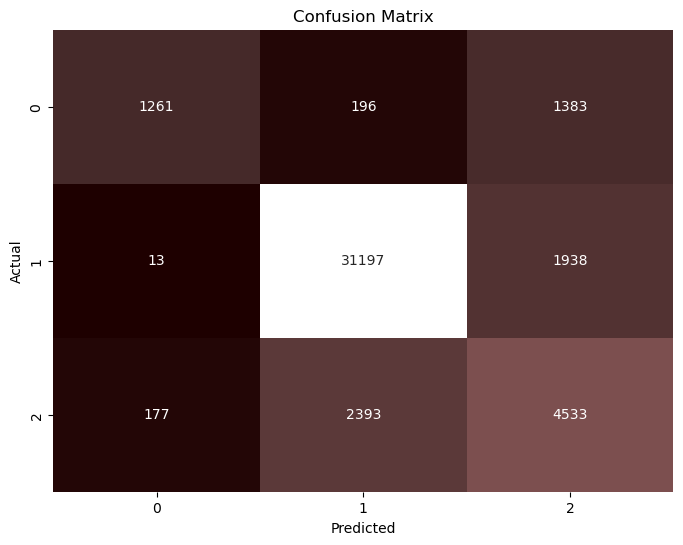

In [107]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Class imbalance

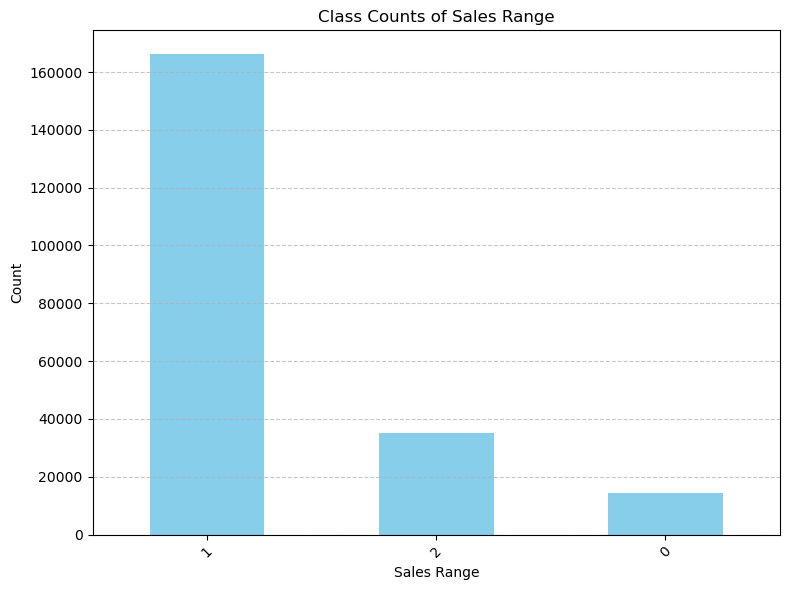

In [108]:
class_counts = filtered_data['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [109]:
#sample of low sales
df_0 = filtered_data[filtered_data['sales_range'] == 1].sample(n=14354, random_state=42)

#sample of medium sales
df_1 = filtered_data[filtered_data['sales_range'] == 0].sample(n=14354, random_state=42)

#sample of high sales
df_2 = filtered_data[filtered_data['sales_range'] == 2].sample(n=14354, random_state=42)

#combine the samples
df_sampled = pd.concat([df_0, df_1,df_2])

#shuffle the samples
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#find its shape
print(df_sampled.shape)

(43062, 115)


In [110]:
df_sampled.head()

,AQ 5000 Series Electron 8 5900X Desktop Processor,AQ 5000 Series Electron 9 5900X Desktop Processor,AQ 5000 Series Ultron 8 5900X Desktop Processor,AQ Aspiron,AQ Clx1,AQ Clx2,AQ Clx3,AQ Digit,AQ Digit SSD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache,...,Sweden,USA,United Kingdom,Brick & Mortar,E-Commerce,Direct,Distributor,Retailer,month_numeric,sales_range
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,5,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,3,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,3,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,4,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,11,2


In [111]:
df_sampled.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Naive_bayes_prep_data_sampled.csv')

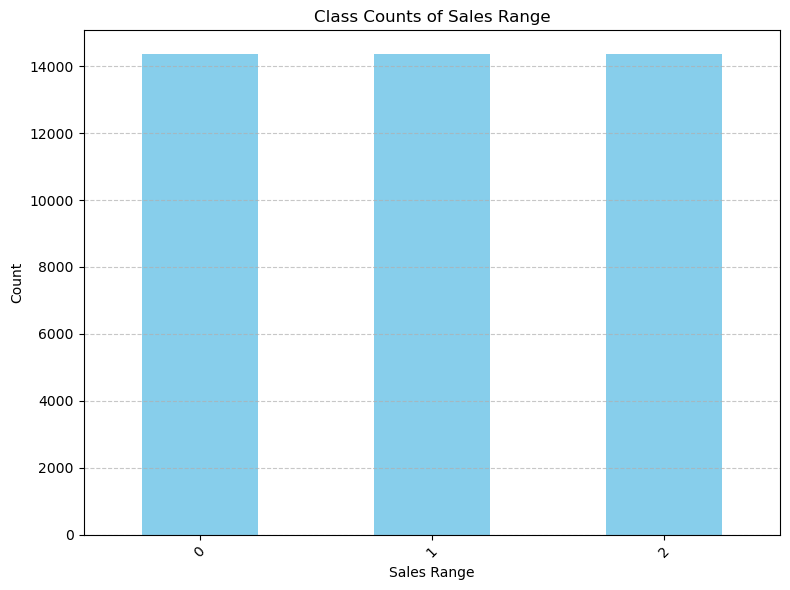

In [112]:
class_counts_1 = df_sampled['sales_range'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
class_counts_1.plot(kind='bar', color='skyblue')
plt.title('Class Counts of Sales Range')
plt.xlabel('Sales Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [113]:
#Separate  X and Y
X = df_sampled.drop("sales_range", axis = 1)
y = df_sampled['sales_range']


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Initializing and training the Naive Bayes classifier
nb_multi_model = MultinomialNB()
nb_multi_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_3 = nb_multi_model.predict(X_test)

In [116]:
# Compute accuracy score
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Compute precision score
precision_3 = precision_score(y_test, y_pred_3, average='weighted') 

# Compute recall score
recall_3 = recall_score(y_test, y_pred_3, average='weighted')  

# Compute F1-Score
f1_3 = f1_score(y_test, y_pred_3, average='weighted')  

# Compute Confusion Matrix
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

# Print the evaluation metrics
print("Accuracy:", accuracy_3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-Score:", f1_3)
print("Confusion Matrix:\n", conf_matrix_3)

Accuracy: 0.782189713224196
Precision: 0.7983934091705409
Recall: 0.782189713224196
F1-Score: 0.7852354844772671
Confusion Matrix:
 [[2483    5  402]
 [  28 2156  701]
 [ 615  125 2098]]


In [117]:
result4 = classification_report(y_test, y_pred_3)
print("Classification Report:",)
print (result4)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      2890
           1       0.94      0.75      0.83      2885
           2       0.66      0.74      0.69      2838

    accuracy                           0.78      8613
   macro avg       0.80      0.78      0.78      8613
weighted avg       0.80      0.78      0.79      8613



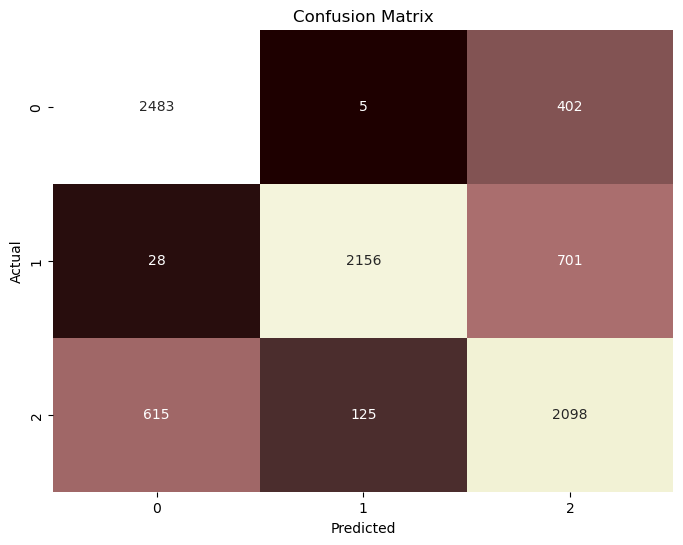

In [118]:
# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, cmap='pink', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [119]:
scores_3 = cross_val_score(nb_multi_model, X_train, y_train, cv=10, scoring='accuracy')

#cross validation scores with respect to accuracy
print("Cross-Validation Scores:", scores_3)

#compute mean
print("Mean Accuracy:", scores_3.mean())

Cross-Validation Scores: [0.77706821 0.77880987 0.79303338 0.78345428 0.78461538 0.77648766
 0.79477504 0.78345428 0.77474601 0.7775842 ]
Mean Accuracy: 0.7824028326329293
